![House Prices](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png)

# House Prices: Advanced Regression Techniques


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#modeling">Modeling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Some description of the competition based on: 

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# check use in https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
from scipy import stats 
from scipy.stats import norm, skew

# check use in https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# import data and check first few lines
df_train = pd.read_csv('C:/Users/joaon/Documents/Method Data Science/data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# number of rows and columns of our dataframe
df_train.shape

(1460, 81)

In [4]:
# check some details about our dataframe with the .info() method
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# summary statistics (we have 38 numerical columns)
pd.set_option("display.max_columns",40)
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# missing values
df_train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

# ?

> there are some missing values: what's the best strategy to deal with them?

> check this kernel: https://www.kaggle.com/dansbecker/handling-missing-values


### Data Cleaning

In [17]:
len(df_train)

1460

In [28]:
# adapted from https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

n_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum()/len(df_train)).sort_values(ascending=False)

missing_values = pd.concat([total_missing, percent_missing], axis=1, keys=['n', '%'])
missing_values.head(10)

,n,%
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [30]:
# dropping features with >50% of the values missing
df_train = df_train.drop((missing_values[missing_values['%'] > 0.5]).index, axis = 1)

In [33]:
# dataframe after dropping these features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [34]:
# missing values
df_train.isnull().sum().sort_values(ascending=False)

# the remaining missing values will be imputed at a later stage

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
RoofMatl           0
RoofStyle          0
SalePrice          0
Exterior1st        0
Exterior2nd        0
YearBuilt          0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BldgType           0
OverallCond        0
OverallQual        0
HouseStyle         0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

# ?
 
> should we manually standardize/normalize data?

<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis 

In [10]:
# columns labels
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


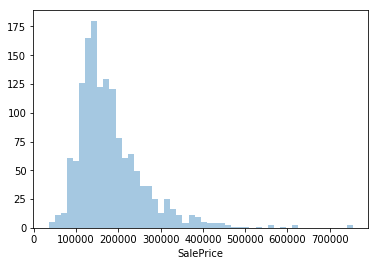

In [11]:
# histogram of dependent variable SalePrice
sns.distplot(df_train['SalePrice'], kde = False, bins = 50);

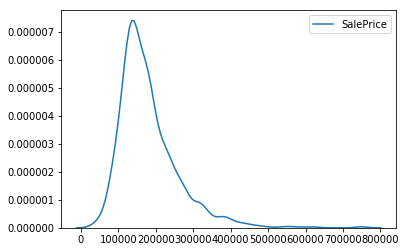

In [12]:
# kernel density estimation of dependent variable SalePrice
sns.kdeplot(df_train['SalePrice']);

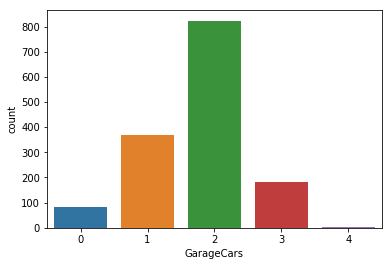

In [13]:
# countplot of independet variable GarageCars
sns.countplot(df_train['GarageCars']);

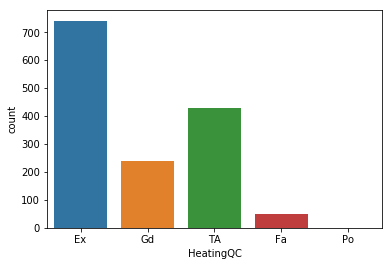

In [14]:
# countplot of independet variable HeatingQC
sns.countplot(df_train['HeatingQC']);

### Bivariate Analysis 

In [15]:
#correlation between the dependet variable SalePrice and all the other variables
df_train.corrwith(df_train.SalePrice).sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
dtype: float64

> As expected, there's a **very strong positive correlation** between **OverallQual** and **GrLivArea** with **SalePrice**. There's also a **strong positive correlation** between **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF** and **FullBath** with **SalePrice**. On the other end of the spectrum, there's a somewhat important **negative correlation** between **EnclosedPorch** and **KitchenAbvGr** and **SalePrice**.

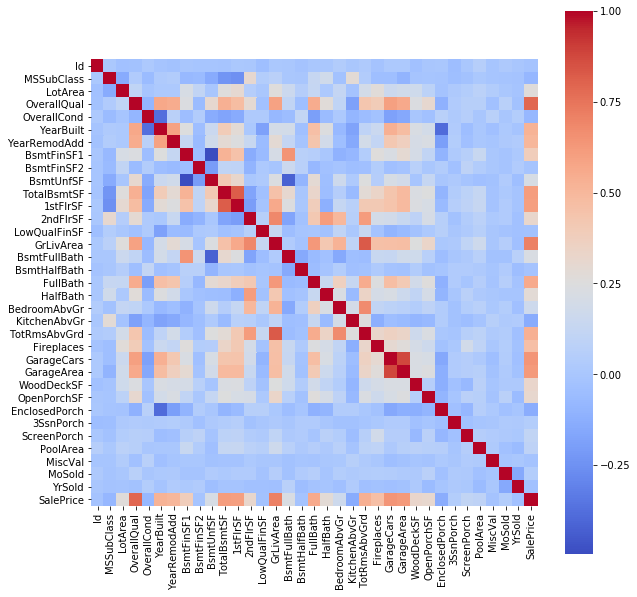

In [16]:
# heatmap with all the variables
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), square = True, cmap = "coolwarm");

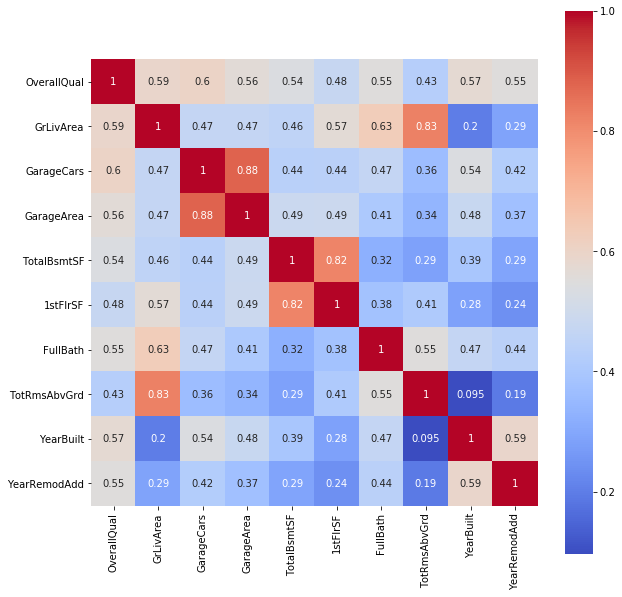

In [17]:
# heatmap for variables with an abs(correlation) > 0.5  with SalePrice
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
plt.figure(figsize=(10,10))
sns.heatmap(df_train[features].corr(), annot = True, square = True, cmap = "coolwarm");

> There's a very strong correlation between **GarageCars and GarageArea**, which is natural. There's also a very strong correlation between **TotalBsmtSF and 1stFlrSF** and between **TotRmsAbvGrd and GrLivArea**. We should have this in mind when building our model due to multicollinearity effects.

In [18]:
# from the features selected before, let's exclude GarageArea, 1stFlrSf and TotalRmsAbvGrd
# and include SalePrice
variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

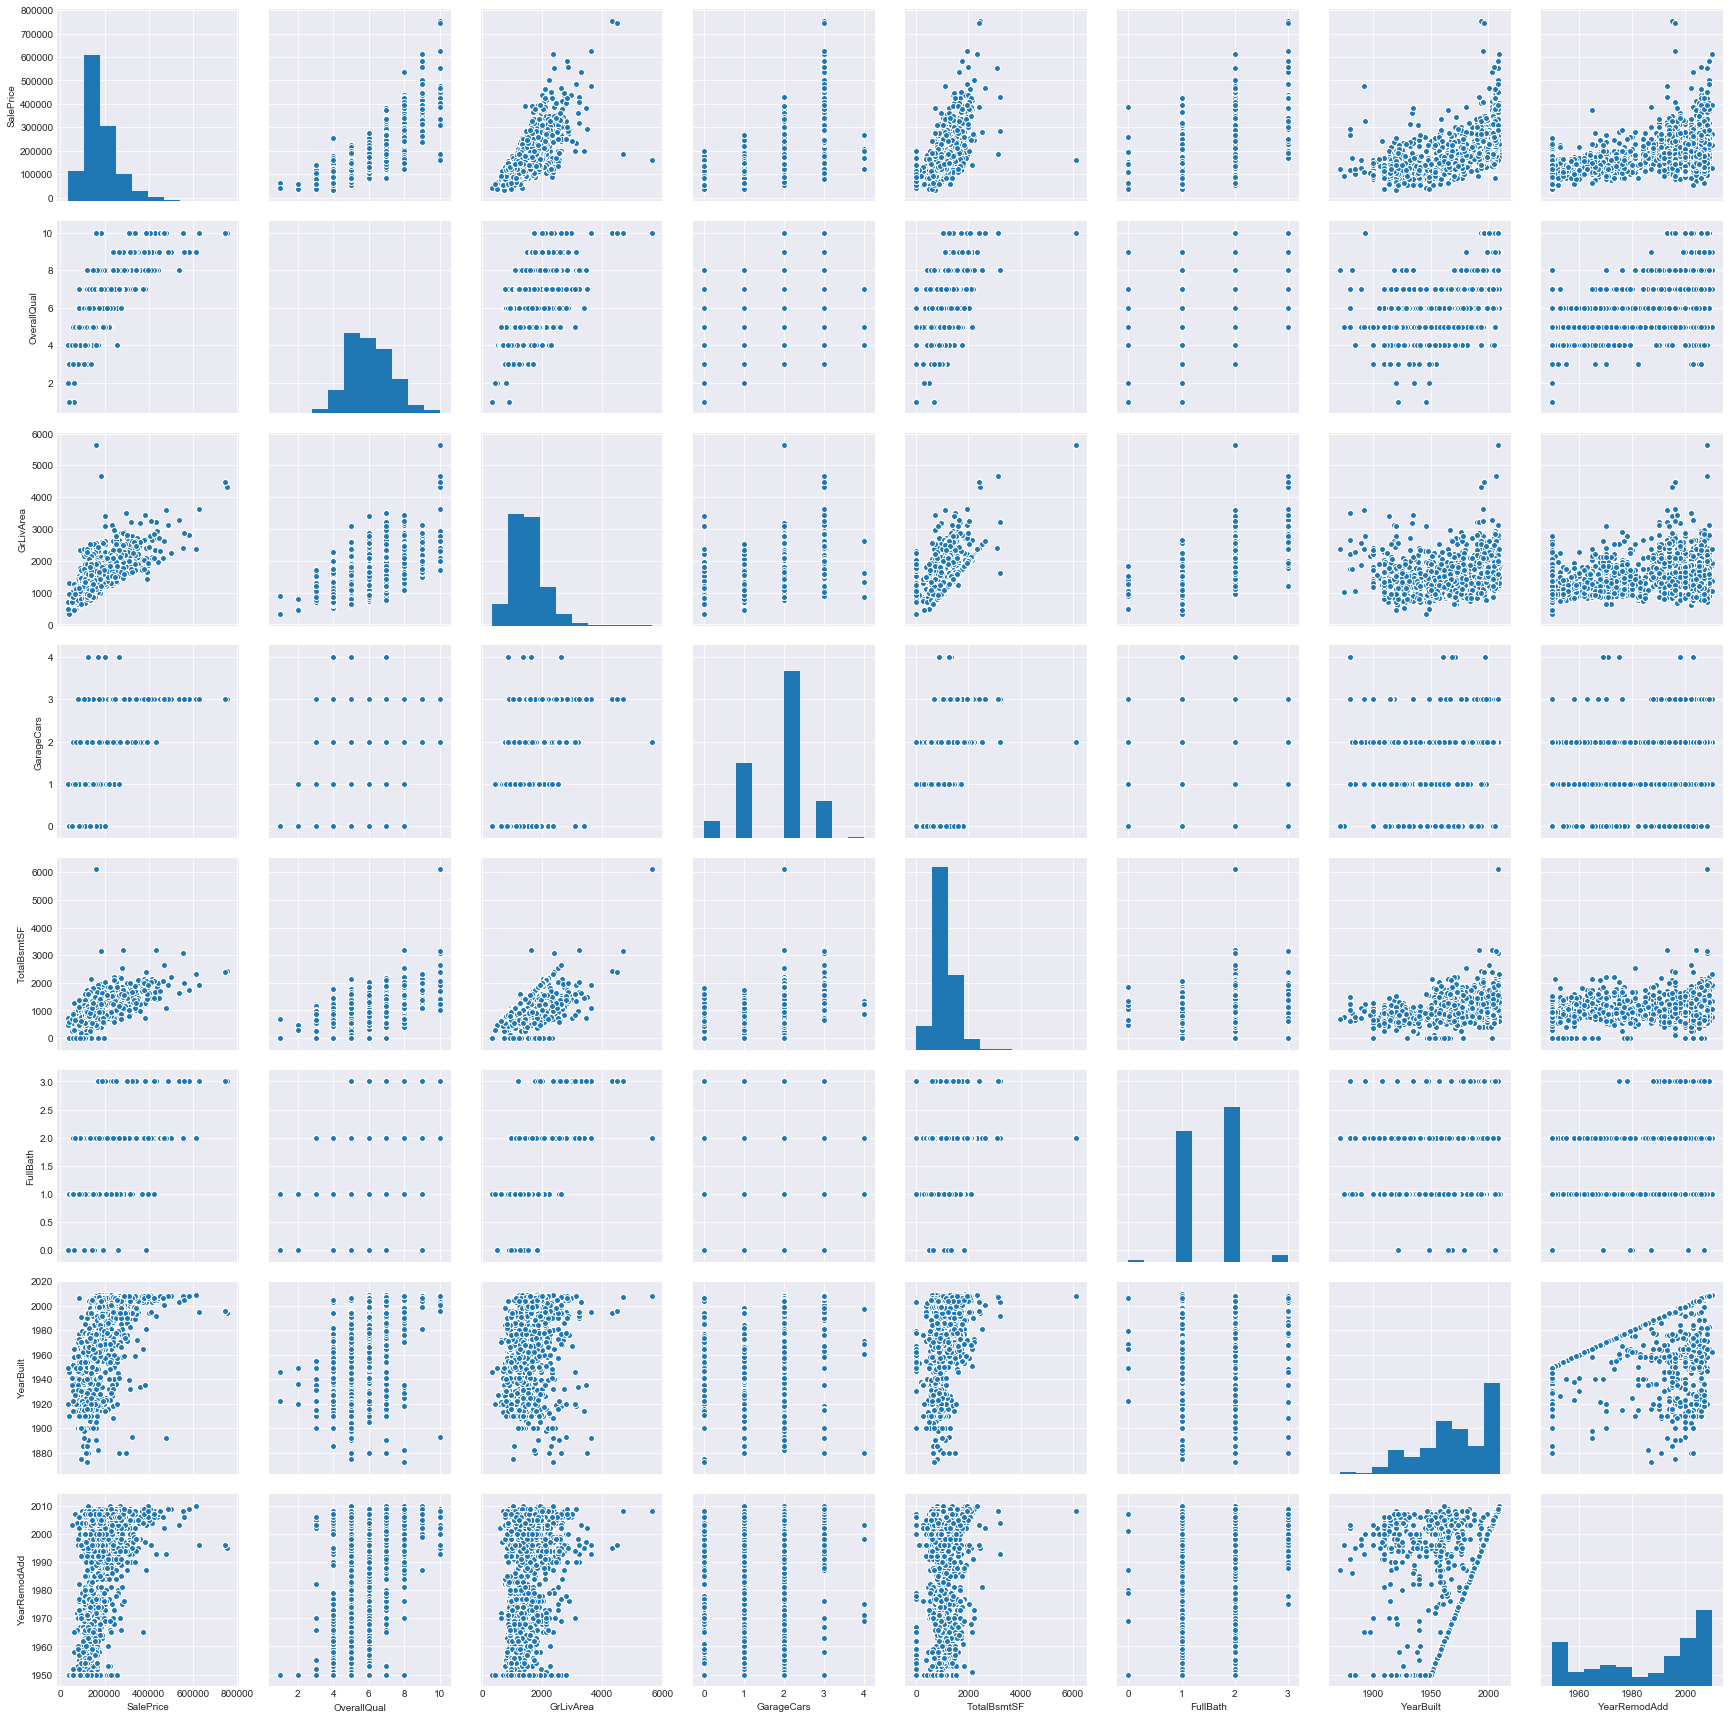

In [19]:
# pair plots for these variables
sns.set_style('darkgrid')
sns.pairplot(df_train[variables], size = 3);

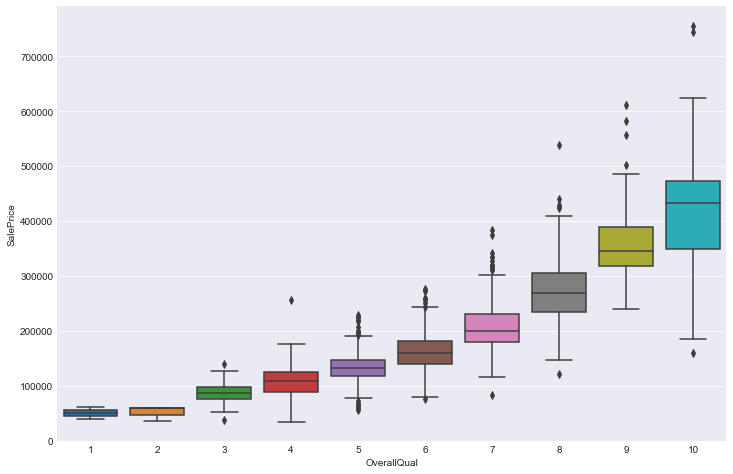

In [20]:
# box plot
plt.figure(figsize=(12,8))
sns.boxplot(x='OverallQual', y="SalePrice", data=df_train);

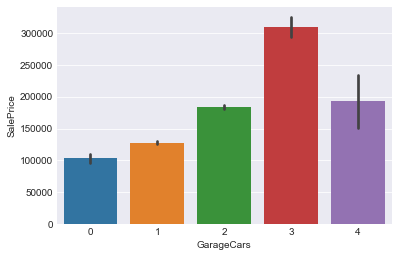

In [21]:
# bar plot
sns.barplot(x = 'GarageCars', y = 'SalePrice', data = df_train);

C:\Users\joaon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


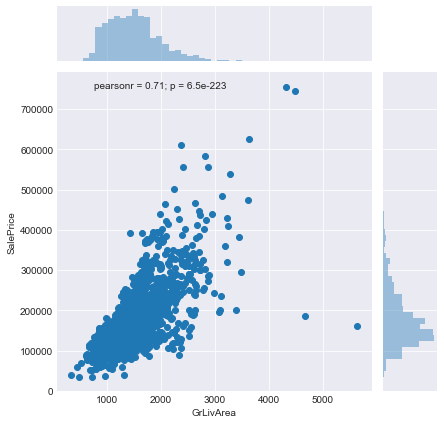

In [22]:
#scatter plot
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = df_train);

# ?

some of these values seem to be **outliers**: check the best way to deal with them

### Multivariate Analysis 

In [23]:
df_train.sort_values(by = 'SalePrice', ascending = False)['SalePrice'].head()

691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64

In [24]:
df_train.sort_values(by = 'GrLivArea', ascending = False)['GrLivArea'].head()

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

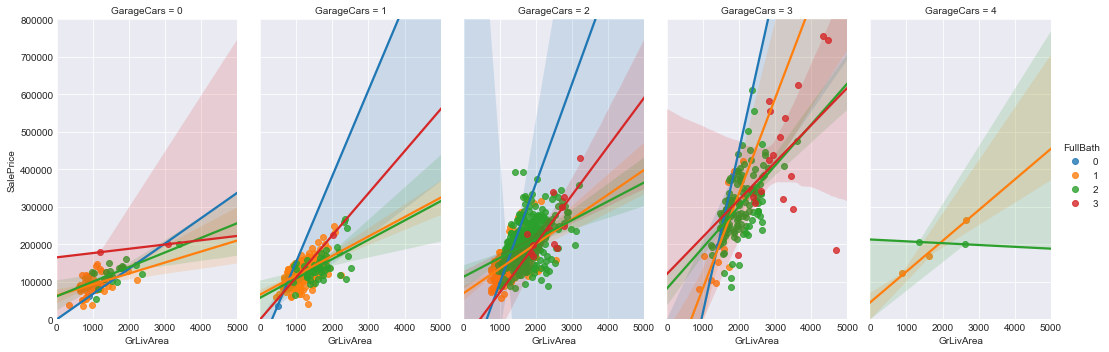

In [25]:
g = sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = df_train, col = 'GarageCars', hue = 'FullBath', 
               aspect = 0.6, size = 5)
g.set(xlim = (0, 5000))
g.set(ylim = (0, 800000));

<a id='fe'></a>
## Feature Engineering

### Feature Selection

#### Encoding Categorical Variables

In [26]:
df_train.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
#adapted from https://www.kaggle.com/stephaniestallworth/housing-feature-engineering-regression

# Encode data
df_train['MSZoning'] = df_train['MSZoning'].map({'A':0,'FV':1,'RL':2,'RP':3,'RM':4,'RH':5,'C (all)':6,'I':7})
df_train['Street'] = df_train['Street'].map({'Grvl':0,'Pave':1})
df_train['LotShape'] = df_train['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
df_train['LandContour'] = df_train['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df_train['Utilities'] = df_train['Utilities'].map({'NoSeWa':0,'NoSeWa':1,'AllPub':2})
df_train['LotConfig'] = df_train['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
df_train['LandSlope'] = df_train['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df_train['Neighborhood'] = df_train['Neighborhood'].map({'Blmngtn':0,'Blueste':1,'BrDale':2,'BrkSide':3, 'ClearCr':4,'CollgCr':5,'Crawfor':6,'Edwards':7,'Gilbert':8,
                                                             'IDOTRR':9,'MeadowV':10,'Mitchel':11, 'NAmes':12,'NoRidge':13,'NPkVill':14,'NridgHt':15, 'NWAmes':16,
                                                             'OldTown':17,'SWISU':18,'Sawyer':19, 'SawyerW':20,'Somerst':21,'StoneBr':22,'Timber':23,'Veenker':24})

df_train['Condition1'] = df_train['Condition1'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
df_train['Condition2'] = df_train['Condition2'].map({'Artery':0,'Feedr':1,'Norm':2,'RRNn':3, 'RRAn':4,'PosN':5,'PosA':6,'RRNe':7,'RRAe':8})
df_train['BldgType'] = df_train['BldgType'].map({'Twnhs':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})
df_train['HouseStyle'] = df_train['HouseStyle'].map({'1Story':0,'1.5Fin':1,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})
df_train['RoofStyle'] = df_train['RoofStyle'].map({'Flat':0,'Gable':1,'Gambrel':2,'Hip':3,'Mansard':4,'Shed':5})
df_train['RoofMatl'] = df_train['RoofMatl'].map({'ClyTile':0,'CompShg':1,'Membran':2,'Metal':3,'Roll':4,'Tar&Grv':5,'WdShake':6,'WdShngl':7})
df_train['Exterior1st'] = df_train['Exterior1st'].map({'AsbShng':0,'AsphShn':1,'BrkComm':2,'BrkFace':3,'CBlock':4,'CemntBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'WdShing':16})
df_train['Exterior2nd'] = df_train['Exterior2nd'].map({'AsbShng':0,'AsphShn':1,'Brk Cmn':2,'BrkFace':3,'CBlock':4,'CmentBd':5,'HdBoard':6,'ImStucc':7,'MetalSd':8,
                                                           'Other':9,'Plywood':10,'PreCast':11,'Stone':12,'Stucco':13,'VinylSd':14,'Wd Sdng':15,'Wd Shng':16})  
df_train['ExterQual'] = df_train['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['ExterCond'] = df_train['ExterCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Foundation'] = df_train['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5})
df_train['Heating'] = df_train['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
df_train['HeatingQC'] = df_train['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['CentralAir'] = df_train['CentralAir'].map({'N':0,'Y':1})
df_train['Electrical'] = df_train['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
df_train['KitchenQual'] = df_train['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_train['Functional'] = df_train['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
df_train['PavedDrive'] = df_train['PavedDrive'].map({'N':0,'P':1,'Y':2})
df_train['SaleType'] = df_train['SaleType'].map({'Oth':0,'ConLD':1,'ConLI':2,'ConLw':3,'Con':4,'COD':5,'New':6,'VWD':7,'CWD':8,'WD':9})
df_train['SaleCondition'] = df_train['SaleCondition'].map({'Partial':0,'Family':1,'Alloca':2,'AdjLand':3,'Abnorml':4,'Normal':5})

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null int64
LotArea          1459 non-null int64
Street           1459 non-null int64
LotShape         1459 non-null int64
LandContour      1459 non-null int64
Utilities        1459 non-null int64
LotConfig        1459 non-null int64
LandSlope        1459 non-null int64
Neighborhood     1459 non-null int64
Condition1       1459 non-null int64
Condition2       1459 non-null int64
BldgType         1459 non-null int64
HouseStyle       1459 non-null int64
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null int64
RoofMatl         1459 non-null int64
Exterior1st      1459 non-null int64
Exterior2nd      1459 non-null int64
ExterQual        1459 non-null int64
Exter

#### Selecting the best variables

In [29]:
X = df_train.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

#Feature selector
from sklearn.feature_selection import SelectPercentile, f_regression

# Instantiate object
selector_f = SelectPercentile(f_regression, percentile=20)

# Fit and transform
x_best = selector_f.fit_transform(X, y)

In [30]:
support = np.asarray(selector_f.get_support())

# Column names of top 20%
features = np.asarray(X.columns.values)
features_with_support = features[support]

#f-scores of top 20%
fscores = np.asarray(selector_f.scores_)
fscores_with_support = fscores[support]

# p-values of top 20%
pvalues = np.asarray(selector_f.pvalues_)
pvalues_with_support = pvalues[support]

# Dataframe of top 20%
top20 = pd.DataFrame({'F-score':fscores_with_support,
                      'p-value':pvalues_with_support},
                     index = features_with_support)

# top20.index.name = 'Feature'
print('Top 20% best associated features to SalePrice\nNumber of features:',len(features_with_support))
print(top20.sort_values(by = 'p-value', ascending = 'True'))


Top 20% best associated features to SalePrice
Number of features: 13
                  F-score        p-value
OverallQual   2436.531857  2.732865e-313
GrLivArea     1469.519195  6.497324e-223
ExterQual     1271.711282  9.348924e-201
KitchenQual   1123.379706  4.667637e-183
GarageCars    1013.352125  2.942120e-169
GarageArea     926.274007  6.822251e-158
TotalBsmtSF    881.230814  7.540001e-152
1stFlrSF       845.454476  5.771340e-147
FullBath       668.725889  1.153088e-121
TotRmsAbvGrd   580.533911  3.086270e-108
YearBuilt      549.374946  2.364248e-103
YearRemodAdd   505.251050   2.645358e-96
Fireplaces     406.312309   6.713872e-80


> We know that of these variables, **GrLivArea and TotRmsAbvGrd are highly correlated** and that **Garage Cars is also highly correlated with Garage Area**.

> We will exclude the ones that are less correlated with SalePrice to build our model

In [31]:
df_features = df_train[features_with_support]
df_features.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea'],
      dtype='object')

In [32]:
df_features = df_features.drop(['TotRmsAbvGrd','GarageArea'], axis = 1)
df_features.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'Fireplaces',
       'GarageCars'],
      dtype='object')

### Feature creation

# ?

> we could try to combine some of the features, but I don't know what the best approach is

<a id='modeling'></a>
## Modeling

In [33]:
#adapted from https://www.kaggle.com/stephaniestallworth/housing-feature-engineering-regression

# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# define training target (train_y) and training predictors (train_X)
X = df_train[df_features.columns]
y = df_train['SalePrice']

# split training data into train and test sets so we can evaluate our model
# we will use these parameters to build our model with all the training data afterwards
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 101)

# fit
my_model = RandomForestRegressor(n_estimators = 325, random_state = 0) 
my_model.fit(X_train,y_train)

# predict
pred_prices = my_model.predict(X_test)

# evaluation
from sklearn import metrics
print('Root-Mean-Squared-Error (RMSE):',np.sqrt(metrics.mean_squared_error(y_test, pred_prices)))
print('R^2 =',metrics.explained_variance_score(y_test, pred_prices))

Root-Mean-Squared-Error (RMSE): 30702.594027137504
R^2 = 0.8250466454125951


In [34]:
# based on https://www.kaggle.com/dansbecker/submitting-from-a-kernel

# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

# define training target (train_y) and training predictors (train_X)
train_X = df_train[df_features.columns]
train_y = df_train['SalePrice']

# fit using n_estimators used before to minimize RMSE
my_model = RandomForestRegressor(n_estimators = 325, random_state = 0)
my_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
# import test data
df_test = pd.read_csv('C:/Users/joaon/Documents/Method Data Science/data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,...,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,...,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,...,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,...,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,...,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
# selecting only variables of interest (including 'Id' necessary for submission)
cols = list(df_features.columns.values)
cols.append('Id')

df_test = df_test[cols]

In [37]:
# missing values
df_test.isnull().sum().sort_values(ascending=False)

GarageCars      1
KitchenQual     1
TotalBsmtSF     1
Id              0
Fireplaces      0
FullBath        0
GrLivArea       0
1stFlrSF        0
ExterQual       0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [38]:
df_test.loc[df_test['GarageCars'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
1116,5,1923,1999,TA,859.0,942,1828,2,Gd,0,NaN,2577


In [39]:
df_test.loc[df_test['KitchenQual'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
95,5,1917,1950,TA,689.0,725,1224,1,NaN,0,1.0,1556


In [40]:
df_test.loc[df_test['TotalBsmtSF'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageCars,Id
660,4,1946,1950,TA,NaN,896,896,1,TA,0,1.0,2121


In [41]:
# dropping these 3 rows
df_test = df_test.drop(df_test.loc[df_test['GarageCars'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['KitchenQual'].isnull()].index)
df_test = df_test.drop(df_test.loc[df_test['TotalBsmtSF'].isnull()].index)

In [42]:
# dataframe after data cleaning
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1458
Data columns (total 12 columns):
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
ExterQual       1456 non-null object
TotalBsmtSF     1456 non-null float64
1stFlrSF        1456 non-null int64
GrLivArea       1456 non-null int64
FullBath        1456 non-null int64
KitchenQual     1456 non-null object
Fireplaces      1456 non-null int64
GarageCars      1456 non-null float64
Id              1456 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 147.9+ KB


In [43]:
# Encode categorical variables in test data as done before 
df_test['ExterQual'] = df_test['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_test['KitchenQual'] = df_test['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [44]:
# checking our dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1458
Data columns (total 12 columns):
OverallQual     1456 non-null int64
YearBuilt       1456 non-null int64
YearRemodAdd    1456 non-null int64
ExterQual       1456 non-null int64
TotalBsmtSF     1456 non-null float64
1stFlrSF        1456 non-null int64
GrLivArea       1456 non-null int64
FullBath        1456 non-null int64
KitchenQual     1456 non-null int64
Fireplaces      1456 non-null int64
GarageCars      1456 non-null float64
Id              1456 non-null int64
dtypes: float64(2), int64(10)
memory usage: 147.9 KB


In [45]:
# define test predictors (test_X)
test_X = df_test.drop('Id', axis = 1)

# use the model to make predictions
pred_prices = my_model.predict(test_X)

print(pred_prices)

[115865.60923077 138057.78461538 166282.01538462 ... 152163.32923077
 106683.31282051 227365.95384615]


# ?

> try XGBoost based on https://www.kaggle.com/dansbecker/xgboost

> check stacked regressions based on https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [46]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': pred_prices})

#create submission file
my_submission.to_csv('submission.csv', index=False)

<a id='conclusions'></a>
## Conclusions

> write some conclusions